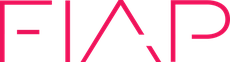

<center>
    <span style="color: #ed145b; font-size: 16pt; font-family: Arial, Helvetica, sans-serif; display: inline-flex; align-items: center;">Faculdade de Informática e Administração Paulista</span>
    <br/><br/>
    <span style="color: #ed145b; font-size: 12pt; font-family: Arial, Helvetica, sans-serif; display: inline-flex; align-items: center;">Inteligência Artificial e Computacional</span>
</center>

<span style="font-size: 12pt; font-family: 'Courier New', Courier, monospace;" >
    <center><strong>Integrantes:</strong></center>
    <table cellspacing="0" cellpadding="2" style="font-size: 12pt; font-family: 'Courier New', Courier, monospace;">
        <tr>
            <td>Bruno Jin Nakagawa</td>
            <td>RM82107</td>
        </tr>
        <tr>
            <td>Luca Alexandre Parra Pinto</td>
            <td>RM82617</td>
        </tr>
        <tr>
            <td>Lucca de Souza R. D'Alessio</td>
            <td>RM80877</td>
        </tr>
        <tr>
            <td>Matheus Wilson S. Queiroz</td>
            <td>RM82008</td>
        </tr>
        <tr>
            <td>Rodrigo Nascimento de Souza</td>
            <td>RM81948</td>
        </tr>
        <tr>
            <td>Thais Helena Fernandes Marques</td>
            <td>RM83621</td>
        </tr>
      </table>
</span>

# Pump it Up


## Introdução

Realizar análise exploratória do conjuntos de dados da Taarifa, uma plataforma open source para a geração de relatórios e a triagem de informações relacionadas à infraestrutura. Ele possuem projetos na Tanzania, entre outros parceiros.

O conjunto de dados disponibilizado pela Taarifa provem de uma parceira com o Ministério das Águas da Tanzânia.

Na lista abaixo estão todas as funcionalidades dos campos presentes no csv: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#features_list

## Objetivo

Analisar e identificar questões semânticas sobre esses conjuntos de dados. As análises foram criadas em Python3 e discutidas entre os integrantes da equipe para chegar em um consenso.

### Questões

**1.** Existe correlação entre a forma de pagamento e a qualidade ou quantidade da água (payment_type X quality_group X quantity_group)

**2.** Que tipos de fonte possuem melhor qualidade ou quantidade da água (source_type X quality_group X quantity_group)

**3.** Existe correlação entre a disponibilidade e a população em torno da fonte (population X amount_tsh)

#### Bibliotecas
A biblioteca Pandas foi utilizada para extrair as informações do _dataset_ e iniciar as análises.  
Adicionalmente, o seaborn e o pyplot foram utilizados para gerar gráficos

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importando o _dataset_

In [8]:
dataset = pd.read_csv("data/pumpit.csv", index_col=0)

Visualizando a forma do dataset

In [9]:
dataset.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
dataset.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

### Analise Questão 1

Agrupamos por tipo de pagamento, a quantidade de poços em cada grupo de qualidade de água

In [11]:
paytypexqual = dataset.groupby('payment_type').quality_group.value_counts()

Obtendo a porcentagem de poços de cada grupo de qualidade por tipo de pagamento

In [13]:
paytypexqualp = paytypexqual/paytypexqual.groupby('payment_type').sum()

In [14]:
paytypexqualp

payment_type  quality_group
annually      good             0.929160
              salty            0.045030
              unknown          0.012356
              fluoride         0.006315
              colored          0.003569
              milky            0.003569
monthly       good             0.943855
              salty            0.044699
              unknown          0.004458
              colored          0.003373
              milky            0.002289
              fluoride         0.001325
never pay     good             0.858845
              salty            0.093341
              unknown          0.022211
              colored          0.012900
              milky            0.008561
              fluoride         0.004142
on failure    good             0.932550
              salty            0.046244
              unknown          0.010475
              milky            0.005365
              colored          0.004599
              fluoride         0.000766
other       

Em seguida, plotamos o dados obtidos na forma de um gráfico de barras

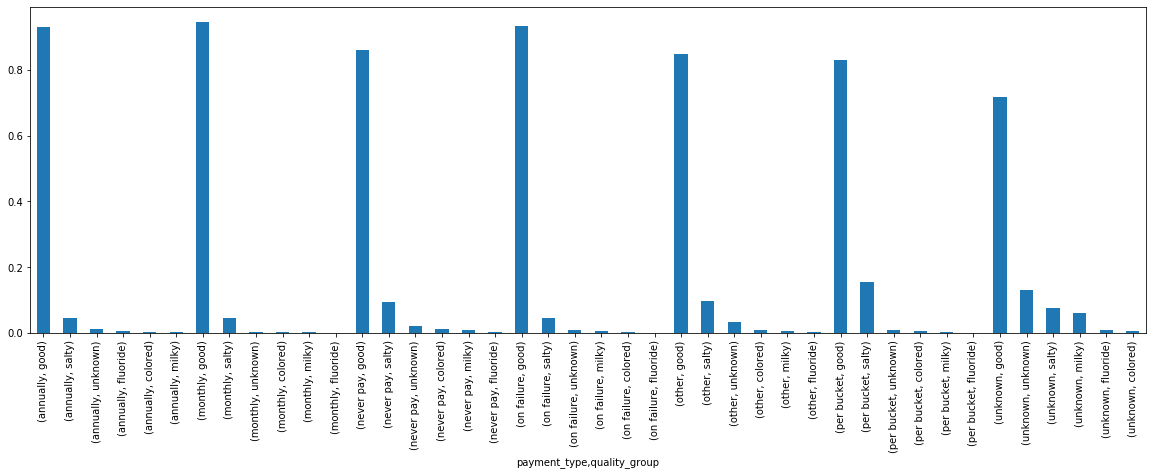

In [15]:
plt.figure(figsize=(20,6))
_ = paytypexqualp.plot(kind='bar')

Agrupamos por tipo de pagamento, a quantidade de poços em cada grupo de quantidade de água

In [16]:
paytypexquant = dataset.groupby('payment_type').quantity_group.value_counts()

Obtendo a porcentagem de poços de cada grupo de quantidade por tipo de pagamento

In [18]:
paytypexquantp = paytypexquant/paytypexquant.groupby('payment_type').sum()

In [19]:
paytypexquantp

payment_type  quantity_group
annually      enough            0.735310
              insufficient      0.154585
              seasonal          0.055739
              dry               0.049149
              unknown           0.005217
monthly       enough            0.633976
              insufficient      0.279277
              dry               0.043614
              seasonal          0.040000
              unknown           0.003133
never pay     enough            0.515504
              insufficient      0.265544
              dry               0.123599
              seasonal          0.086634
              unknown           0.008719
on failure    enough            0.554420
              insufficient      0.274911
              dry               0.088656
              seasonal          0.076137
              unknown           0.005876
other         enough            0.635674
              insufficient      0.182163
              seasonal          0.108159
              dry           

Em seguida, plotamos o dados obtidos na forma de um gráfico de barras

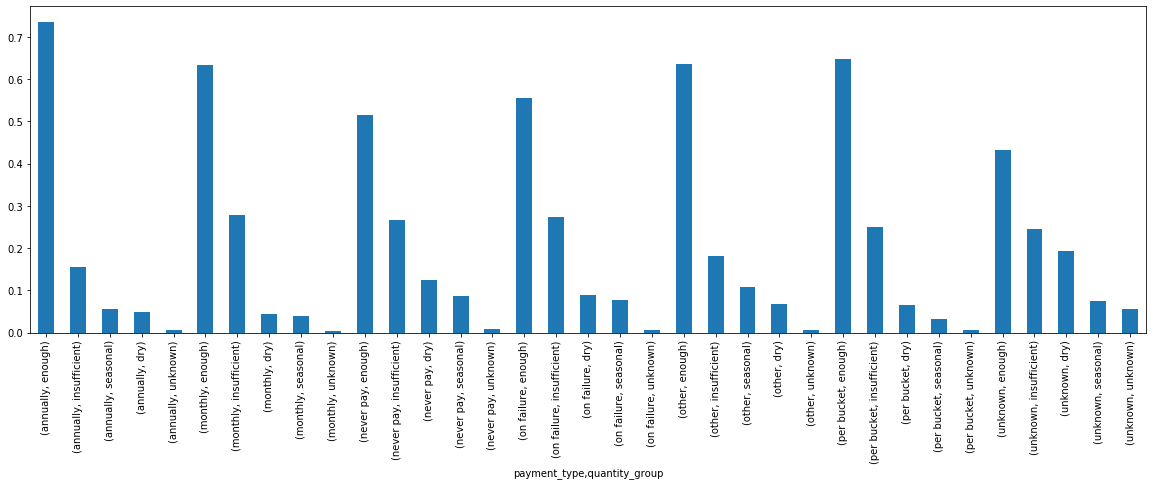

In [20]:
plt.figure(figsize=(20,6))
_ = paytypexquantp.plot(kind='bar')

### Analise Q2

Agrupamos por tipo de poço, a quantidade de poços em cada grupo de qualidade de água

In [21]:
typexqual=dataset.groupby('source_type').quality_group.value_counts()

Obtendo a porcentagem de poços de cada grupo de qualidade por tipo de fonte de água

In [22]:
typexqualp=typexqual/typexqual.groupby('source_type').sum()

In [23]:
typexqualp

source_type           quality_group
borehole              good             0.723575
                      salty            0.209474
                      unknown          0.054147
                      milky            0.005775
                      colored          0.003682
                      fluoride         0.003348
dam                   good             0.841463
                      colored          0.091463
                      unknown          0.045732
                      salty            0.021341
other                 good             0.525180
                      salty            0.266187
                      unknown          0.154676
                      colored          0.050360
                      milky            0.003597
rainwater harvesting  good             0.962092
                      unknown          0.020479
                      salty            0.015686
                      milky            0.001307
                      colored          0.000436
rive

Em seguida, plotamos o dados obtidos na forma de um gráfico de barras

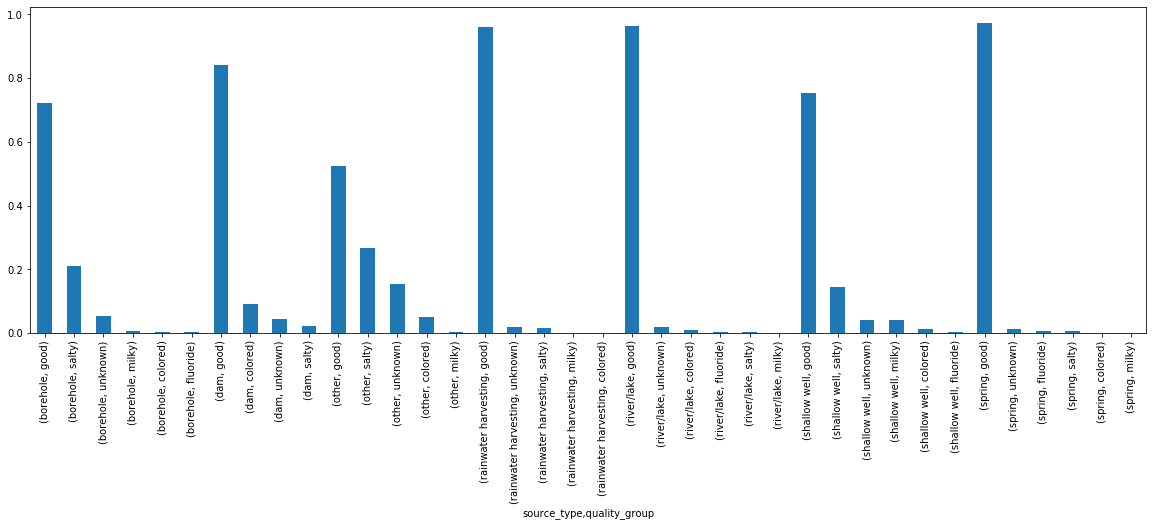

In [24]:
plt.figure(figsize=(20,6))
_ = typexqualp.plot(kind='bar')

Agrupamos por tipo de poço, a quantidade de poços em cada grupo de quantidade de água

In [25]:
typexquant = dataset.groupby('source_type').quantity_group.value_counts()

Obtendo a porcentagem de poços de cada grupo de qualidade por tipo de fonte de água

In [26]:
typexquantp=typexquant/typexquant.groupby('source_type').sum()

In [27]:
typexquantp

source_type           quantity_group
borehole              enough            0.604988
                      insufficient      0.224287
                      dry               0.123190
                      unknown           0.023851
                      seasonal          0.023684
dam                   enough            0.567073
                      insufficient      0.274390
                      dry               0.099085
                      seasonal          0.045732
                      unknown           0.013720
other                 enough            0.482014
                      insufficient      0.244604
                      dry               0.129496
                      unknown           0.100719
                      seasonal          0.043165
rainwater harvesting  seasonal          0.515033
                      insufficient      0.280610
                      enough            0.128540
                      dry               0.065359
                      unknown   

Em seguida, plotamos o dados obtidos na forma de um gráfico de barras

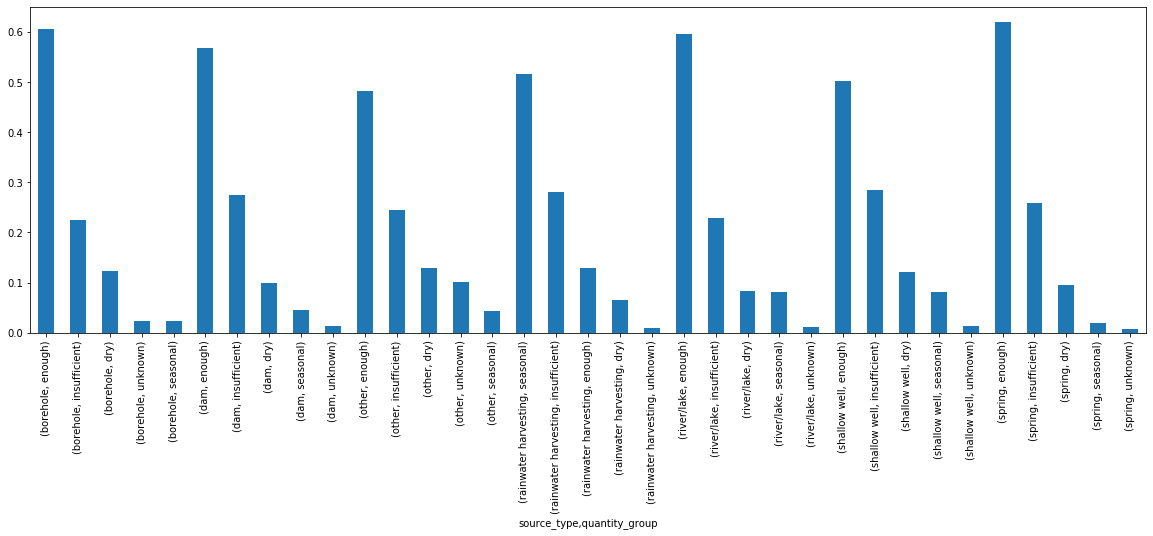

In [28]:
plt.figure(figsize=(20,6))
_ = typexquantp.plot(kind='bar')

### ANALISE Q3

Utilizando o seaborn, plotamos um gráfico de dispersão da quantidade de água disponível pela população ao redor dos poços

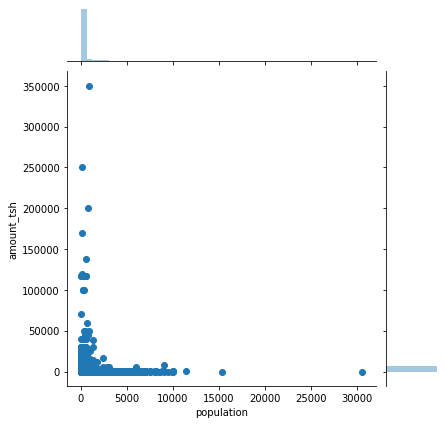

In [29]:
sns.jointplot(y='amount_tsh', x='population',
              data=dataset, kind='scatter');

Com o pandas calculamos o coeficiente de correlação  de spearman entre os dois dados

In [30]:
dataset.loc[:,['amount_tsh','population']].corr(method="spearman")

,amount_tsh,population
amount_tsh,1.000000,0.342656
population,0.342656,1.000000


### Considerações Finais

Questão 1 

Quando o pagamento ocorre anualmente a proporção de poços com agua boa é maior em relação aos gratuitos, estimativa de 22% maior. Não observamos correlação aparente entre a quantidade de água disponível nos poços e o meio de pagamento.

Questão 2

Notamos que quando a fonte da água vem da chuva, lagos, rios e nascentes a porcentagem de postos com água boa é visívelmente maior (estimativa de 10 a 20% maior). E com exceção das fontes de água por chuva (como esperado por ser uma fonte sazonal), todas as outras fontes de água apresentam proporções semelhantes de poços com quantidade suficiente de água em relação a população.

Questão 3 

Não existe correlação aparente entre a quantidade de água disponível nos poços e a população ao redor dos mesmos.